In [67]:
import json
import pandas as pd
from IPython.display import Image

%matplotlib inline

In [49]:
def show_img(id_,dir_):
    '''
    shows image with id_ in dir_
    '''
    return Image(dir_ + f'{3:012}.jpg')

# Initial data exploration

- NB to understand the data we have available and how to use the annotations

In [21]:
# Lets get a list of the validation (train is big not finished DL) images
val_dir = '../data/val_images/'
val_dir_ims = val_dir + 'images/'
ims = !ls {val_dir_ims}
len(ims)

60317

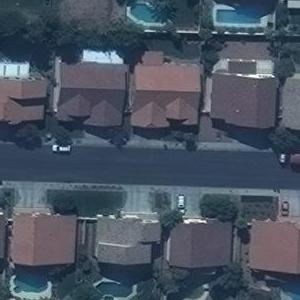

In [118]:
show_img(0,val_dir_ims)

In [33]:
# Lets take a look at the annotations
annotations = !ls {val_dir}*.json

small_annotation = json.loads(open(annotations[0]).read())
small_annotation_df = pd.DataFrame(small_annotation['annotations'])

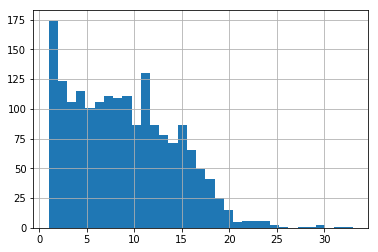

In [78]:
# how many buildings in images
counts = small_annotation_df.image_id.value_counts()
counts.hist(bins=counts.max())

- largest number of images have a single building

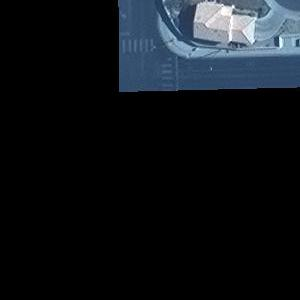

In [108]:
show_img(counts[counts == 1].index[0],val_dir_ims)

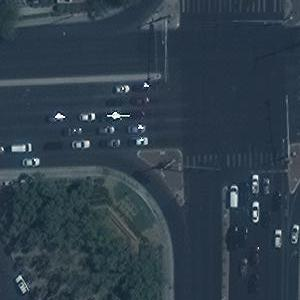

In [109]:
show_img(counts[counts == 1].index[1],val_dir_ims)

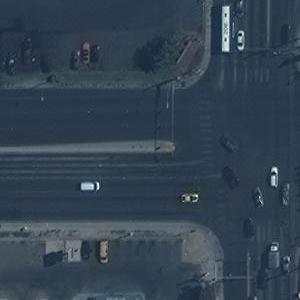

In [110]:
show_img(counts[counts == 1].index[2],val_dir_ims)

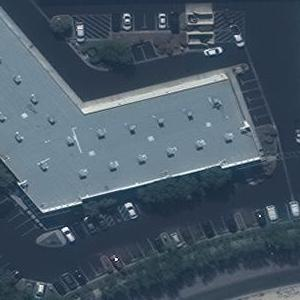

In [111]:
show_img(counts[counts == 1].index[10],val_dir_ims)

- some examples of images with lots of buildings

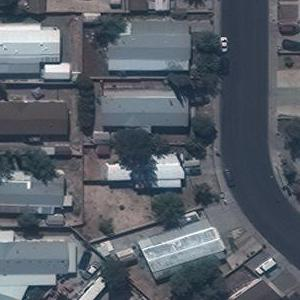

In [114]:
show_img(counts[counts > 16].index[10],val_dir_ims)

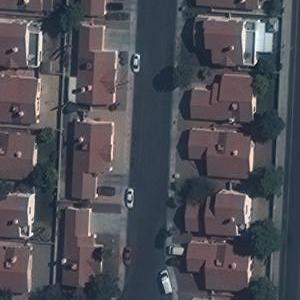

In [116]:
show_img(counts[counts > 16].index[-1],val_dir_ims)

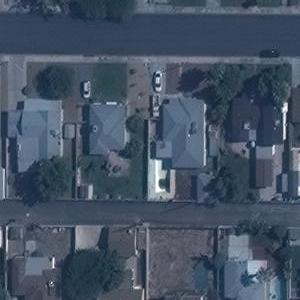

In [117]:
show_img(counts[counts > 16].index[24],val_dir_ims)